# Exploratory Data Analysis of the National Collision Database 2017

In [1]:
import pandas as pd
import numpy as np
import altair as alt

from sklearn.model_selection import train_test_split

alt.data_transformers.enable('data_server')
alt.renderers.enable('mimetype');

In [2]:
# pip install altair_data_server

## Read in the data set

The data set used in this project is National Collision Database (NCDB) 2017 – a database containing all police-reported motor vehicle collisions on public roads in Canada in 2017. 
<ul>
  <li><a href="https://open.canada.ca/data/en/dataset/1eb9eba7-71d1-4b30-9fb1-30cbdab7e63a/resource/01426d41-529c-443f-a901-6bc2f94f3d73">
      Data file can be found here.</a></li>
  <li><a href="https://open.canada.ca/data/en/dataset/1eb9eba7-71d1-4b30-9fb1-30cbdab7e63a/resource/09b74afc-2745-4382-8a02-3e256c4b28fd">
      Data dictionary can be found here.</a></li>

In [3]:
# Importing NCDB
ncdb = pd.read_csv('../data/raw/NCDB_2017.csv', low_memory=False)

# Making all columns contain strings
ncdb = ncdb.astype("string")

# Creating 'FATALITY' column to convert multi-class outcomes to binary-class
ncdb.loc[ncdb['P_ISEV'] == '3', 'FATALITY'] = True
ncdb.loc[ncdb['P_ISEV'] != '3', 'FATALITY'] = False

# Dropping irrelevant or redundant columns
ncdb = ncdb.drop(columns=["C_YEAR", "C_CASE", "C_SEV", "P_ISEV", "V_ID", "P_ID"])

## Summarize the entire data set

Each row in the data set represents different aspects of a collision, including the severity of the collision (no injury or injury or fatality) and other details (collision time, weather condition, road type, vehicle type, etc.).

In [4]:
ncdb.sort_index()

,C_MNTH,C_WDAY,C_HOUR,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_TYPE,V_YEAR,P_SEX,P_AGE,P_PSN,P_SAFE,P_USER,FATALITY
0,01,1,10,01,02,03,1,3,2,18,01,UUUU,M,75,11,NN,1,False
1,01,1,12,01,04,UU,1,5,1,UU,01,UUUU,F,21,11,02,1,False
2,01,1,00,01,03,UU,7,3,1,UU,01,UUUU,F,34,11,02,1,False
3,01,1,17,02,21,UU,1,1,1,18,01,UUUU,F,50,11,02,1,False
4,01,1,17,02,21,UU,1,1,1,18,01,UUUU,M,63,11,NN,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289836,UU,U,UU,UU,UU,01,U,U,U,UU,01,UUUU,F,20,11,NN,1,False
289837,UU,U,UU,UU,UU,01,U,U,U,UU,01,UUUU,F,47,11,NN,1,False
289838,UU,U,UU,UU,UU,01,U,U,U,UU,07,UUUU,M,24,11,NN,1,False
289839,UU,U,23,01,03,01,1,1,2,18,16,UUUU,M,45,96,09,U,False


In [5]:
ncdb.shape

(289841, 18)

## Partition the data set into training and test sets

We will split the data such that the training set takes 90% of observations and the test set takes 10% of observations.

In [6]:
train_df, test_df = train_test_split(ncdb, test_size=0.1, random_state=21)

We will "lock" the test set and only look at the training set from now on. The train data set has 260856 observations and 24 features. The number of observations for the no-fatality vs. fatality classes is shown as follows.

In [7]:
train_count = pd.DataFrame(train_df['FATALITY'].value_counts())
train_count.rename(index={'False':'No fatality', 'True':'Fatality'}, columns={'FATALITY':'Train Count'}, inplace=True)
train_count

,Train Count
False,259176
True,1680


From the data summary, we see a lot of missing values represented with characters such as "N", "U", "X", etc. We will replace them with "missing" before we carry out EDA to avoid errors later on when we try to pass the data to a classifier. 

In [8]:
null_value = ['N', 'NN', 'NNNN', 'Q', 'QQ', 'U', 'UU', 'UUUU', 'X', 'XX', 'XXXX']
train_df = test_df.replace(to_replace=null_value, value='missing')
test_df = test_df.replace(to_replace=null_value, value='missing')
train_df.shape

(28985, 18)

In [9]:
train_df.sort_index()

,C_MNTH,C_WDAY,C_HOUR,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_TYPE,V_YEAR,P_SEX,P_AGE,P_PSN,P_SAFE,P_USER,FATALITY
8,01,1,13,02,35,02,1,1,1,18,01,missing,F,80,11,02,1,False
15,01,1,12,02,21,missing,1,3,4,03,01,missing,F,38,11,missing,1,False
24,01,1,16,02,21,02,1,1,1,01,01,missing,F,43,13,02,2,False
34,01,1,18,01,03,01,6,4,1,18,01,2009,M,51,23,02,2,False
39,01,1,17,02,23,01,4,4,1,12,01,2011,M,27,11,02,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289820,missing,missing,missing,missing,missing,01,missing,missing,missing,missing,01,missing,M,65,11,missing,1,False
289824,missing,missing,missing,missing,missing,01,missing,missing,missing,missing,missing,2000,missing,missing,missing,missing,missing,False
289825,missing,missing,missing,missing,missing,01,missing,missing,missing,missing,missing,2000,missing,missing,missing,missing,missing,False
289834,missing,missing,missing,missing,missing,01,missing,missing,missing,missing,01,missing,M,38,11,missing,1,False


We gather the summary statistics of the train data set as follows.

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28985 entries, 241909 to 39494
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   C_MNTH    28985 non-null  object
 1   C_WDAY    28985 non-null  object
 2   C_HOUR    28985 non-null  object
 3   C_VEHS    28985 non-null  object
 4   C_CONF    28985 non-null  object
 5   C_RCFG    28985 non-null  object
 6   C_WTHR    28985 non-null  object
 7   C_RSUR    28985 non-null  object
 8   C_RALN    28985 non-null  object
 9   C_TRAF    28985 non-null  object
 10  V_TYPE    28985 non-null  object
 11  V_YEAR    28985 non-null  object
 12  P_SEX     28985 non-null  object
 13  P_AGE     28985 non-null  object
 14  P_PSN     28985 non-null  object
 15  P_SAFE    28985 non-null  object
 16  P_USER    28985 non-null  object
 17  FATALITY  28985 non-null  bool  
dtypes: bool(1), object(17)
memory usage: 4.0+ MB


In [11]:
train_df.describe()

,C_MNTH,C_WDAY,C_HOUR,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_TYPE,V_YEAR,P_SEX,P_AGE,P_PSN,P_SAFE,P_USER,FATALITY
count,28985,28985,28985,28985,28985,28985,28985,28985,28985,28985,28985,28985,28985,28985,28985,28985,28985,28985
unique,13,8,25,18,19,10,8,10,7,18,18,59,3,99,14,7,6,2
top,12,5,17,02,21,02,1,1,1,18,01,missing,M,missing,11,02,1,False
freq,2703,4794,2634,17580,8861,13278,20716,19607,21824,14286,23948,2942,14962,1729,20131,20462,18739,28809


## Perform exploratory data analysis on the training set

In order to determine which features might be useful to predict the fatality class, we plotted two bar charts (one for each class) compare the distributions of each feature from the training data set. 

Before plotting, we would need to convert P_SEX column so that all features are of the quantitative type, then create the list of all features to feed into the plots. 

In [12]:
# Converts values of P_SEX column into numeric
sex = {'M': 1, 'F': 0, 'missing': 'missing'}
train_df['P_SEX'] = [sex[item] for item in train_df['P_SEX']]
    
# Creates the list of features to feed into distribution plots
features = list(set(train_df.columns.values) - set(['index', 'FATALITY']))

Based on the plotted distributions, we observed that:
1. There is a huge class imbalance that we need to take into account when building the model. Hence, the inital EDA might not show us the entire picture of the underlying data. 
2. Some features stand out to be more useful for our model because there is quite a difference in their distributions between two classes. For example:
    - V_YEAR: Majority of collisions that happened before 2000s would lead to fatalities.
    - C_CONF: The center and the spread of collision configuration are very different between two classes. For example, a fatality seemed to be more likely in case of a head-on collision (C_CONF = 31) while it did not in case of a rear-end collision (C_CONF = 21).
    - C_HOUR: More fatalities occurred before dawn or after dusk.
    - P_AGE: The distribution of P_AGE for FATALITY = True is bimodal while it is unimodal for FATALITY = False.
3. Some features look similar in their distributions between two classes such as P_SEX, P_PSN, P_USER, C_WTHR, etc. Hence, we might omit these predictors from our model.

In [13]:
# Creates distribution plots when Fatality = False
Chart_False = (
    alt.Chart(train_df)
    .mark_bar(opacity=0.5)
    .encode(
        x=alt.X(alt.repeat("row"), type="quantitative", bin=alt.Bin(maxbins=40)),
        y=alt.Y("count()", title="Number of collisions"),
        color=alt.Color("FATALITY", scale=alt.Scale(range=["blue"]), legend=None))
    .properties(width=150, height=100)
    .repeat(
        row=features,
        columns=1,
        title="FATALITY = False")
    .resolve_scale(y="independent")
    .transform_filter(alt.FieldOneOfPredicate(field="FATALITY", oneOf=[False]))
)
    
# Creates distribution plots when Fatality = True
Chart_True = (
    alt.Chart(train_df)
    .mark_bar(opacity=0.5)
    .encode(
        x=alt.X(alt.repeat("row"), type="quantitative", bin=alt.Bin(maxbins=40)),
        y=alt.Y("count()", title="Number of collisions"),
        color=alt.Color("FATALITY", scale=alt.Scale(range=["green"]), legend=None))
    .properties(width=150, height=100)
    .repeat(
        row=features,
        columns=1,
        title="FATALITY = True")
    .resolve_scale(y="independent")
    .transform_filter(alt.FieldOneOfPredicate(field="FATALITY", oneOf=[True]))
)

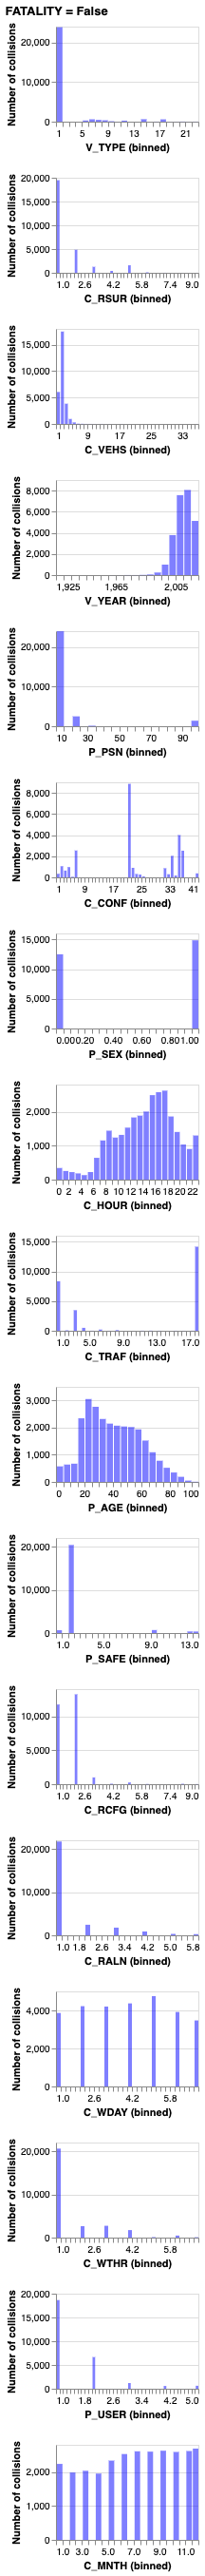

In [17]:
Chart_False

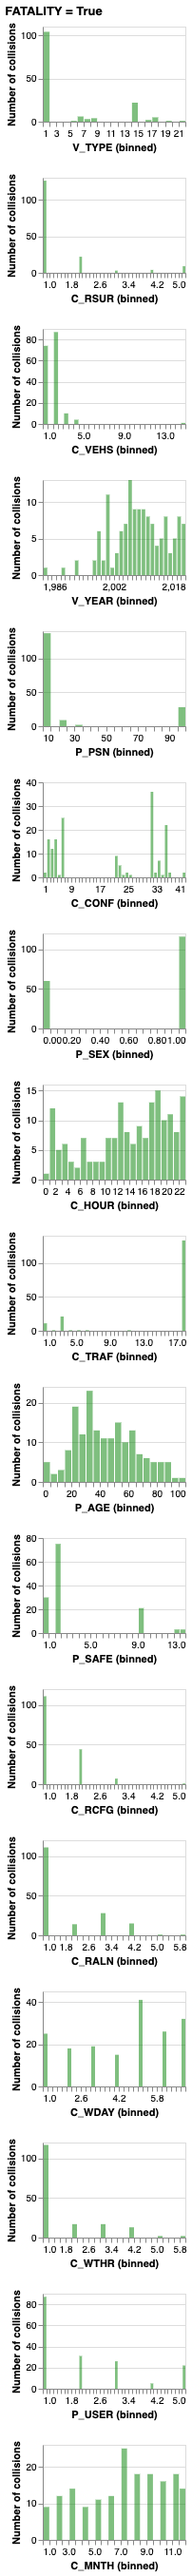

In [16]:
Chart_True

Note: We tried different approaches but could not put two charts next to each other in the same grid. The error we ran into: 
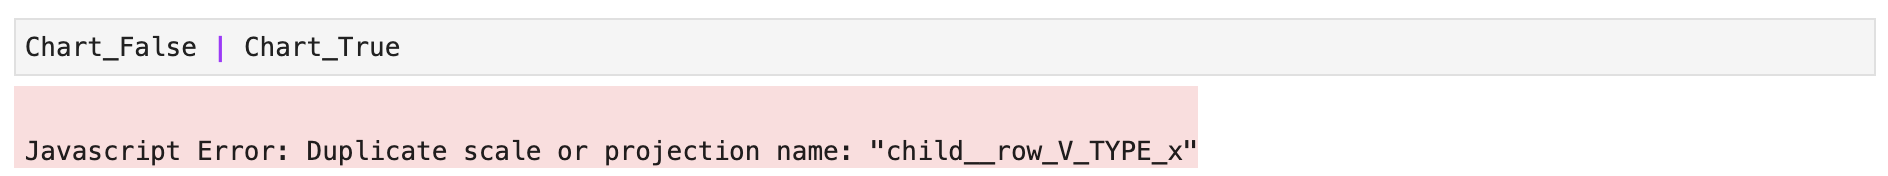

## Create a profile report using `pandas-profiling` (optional)

Uncomment the following code to produce the profile report. We made it optional because the code takes quite a while to run and does not render well on GitHub.

In [15]:
# pip install pandas-profiling
# pip install ipywidgets

#from pandas_profiling import ProfileReport

#profile = ProfileReport(nc_train_nan, title='National Collision Database 2017')

#profile.to_notebook_iframe()